# Problem Statement

##### A US-based Bike sharing system provider, BoomBikes aspires to understand the demand for shared bikes among people.The company wants to know
##### 1. Which variables are significant in predicting the demand for shared bikes
##### 2. How well those variables describe the bike demands

## Step1: Reading and Understanding Data

In [111]:
#import libraries
import numpy as np
import pandas as pd


In [112]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
#load the data
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
#describe the dataset
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [115]:
#shape and basic info
bikes.shape
bikes.dtypes
bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

###### As per the data dictionary, we see that the columns 'season','mnth', 'weekday','weathersit' should be categorical variables.
###### But here we see they are of type int64.Hence we need to convert these columns to category

##### From the data set and the problem statement we can infer that the Target Variable is 'cnt'

## Step 2: Data cleaning and modification

#### Convert the columns 'season','mnth', 'weekday', 'weathersit' to category

In [116]:
#Convert categorical variables from int64 to object
bikes['season']=bikes['season'].astype('category')
bikes['mnth']=bikes['mnth'].astype('category')
bikes['weekday']=bikes['weekday'].astype('category')
bikes['weathersit']=bikes['weathersit'].astype('category')

In [117]:
#Check the datatypes
bikes.dtypes


instant          int64
dteday          object
season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

#### BoomBikes wants to understand the most important factors that drive the demand for rental bikes and create a model surrounding that.
#### From the given dataset we find that the column 'instant' is just an ordinal/index column that does not explain the demand for bikes.Hence we can drop 'instant'
#### The information provided by the 'dteday' column has been split and additionally explained by other columns such as 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday'.The column 'dteday' is therefore redundant and can be dropped.

#### The features 'casual' and 'registered' have been summed up in the variable 'cnt' which is the target variable.Hence we can drop 'casual' and 'registered'

#### Also the feature 'temp' and 'atemp' provide similar information about the same attribute.Hence dropping 'atemp'


In [118]:
#dropping the columns
bikes=bikes.drop(['instant','dteday','casual','registered','atemp'],axis = 1)

In [119]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Check for missing values 

In [120]:
# percentage of the missing values (column-wise)
round(100*(bikes.isnull().sum()/len(bikes.index)), 2)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

#### We see there are no missing values in the dataset

### Relabelling the categorical columns

We see that the columns 'season', 'weekday', 'mnth' and 'weathersit' are all categorical columns having numeric labels.<br>For ease of understanding let us relabel them as per data dictionary

In [121]:
#Re labelling categorical columns
cleanup_nums = {"season":{1: "spring",2:"summer",3:"fall",4:"winter"},
                 "mnth" :{1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},
                "weekday":{0:"Tues",1:"Wed",2:"Thur",3:"Fri",4:"Sat",5:"Sun",6:"Mon"},
                "weathersit":{1:"Clear",2:"Mist",3:"Light Snow", 4:"Heavy Rain"}}
bikes = bikes.replace(cleanup_nums)
bikes.head()
                
               

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3: Visualising the Data

In [122]:
#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

In [123]:
# Created a function to create univariate distribution plots for numeric variables

def generate_univariate_distplots(col):
    
    plot_1 = sns.distplot(bikes['{col}'.format(col = col)])
    
    plot_1.set(xlabel='{col}'.format(col = col), ylabel='Frequency')
    
    plot_1.set_title('{col} vs Demand'.format(col = col),fontsize =18)

    plt.show()

In [124]:
# Created a function to create univariate analysis barplots

def generate_univariate_barplots(col):
    
    plot_1 = (bikes['{col}'.format(col = col)].value_counts(normalize=True)*100).plot.bar()
    
    plot_1.set(xlabel='{col}'.format(col = col), ylabel='Frequency in percentage')
    
    plot_1.set_title('{col} vs Demand in percentage'.format(col = col),fontsize =18)

    plt.show()


#### season

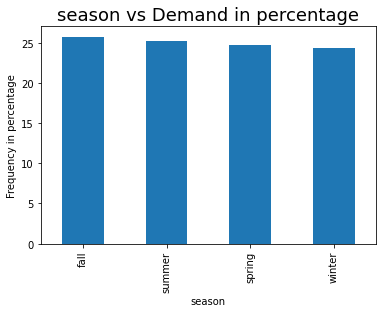

In [125]:
generate_univariate_barplots('season')

######  Insights : season : The maximum demand for rental bikes is in fall follwed by summer

#### mnth

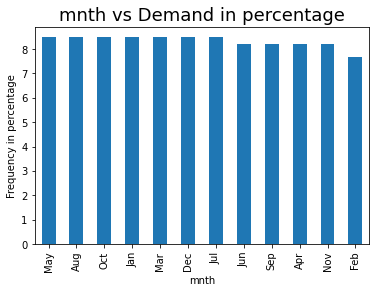

In [126]:
generate_univariate_barplots('mnth')

######  Insights : mnth : The demand is more or less same across all the months and it is little low in Feb

#### weekday

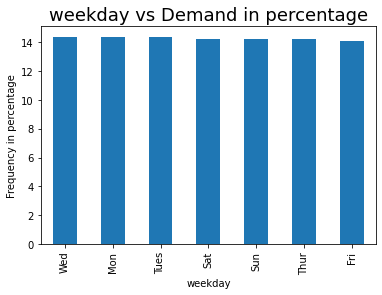

In [127]:
generate_univariate_barplots('weekday')

######  Insights : weekday : The demand does not vary significantly across the days of the week

#### weathersit

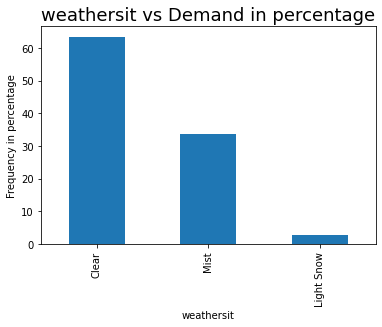

In [128]:
generate_univariate_barplots('weathersit')

######  Insights : weathersit : The demand for rental bikes is highest in clear weather and least in light snow

#### temp

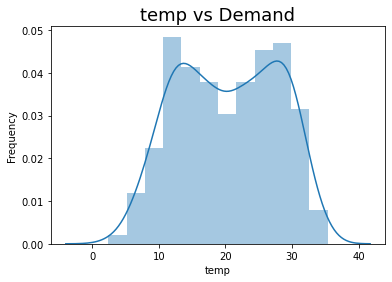

In [129]:
generate_univariate_distplots('temp')

######  Insights : temp : The demand for rental bikes is highest around 11 and 27.This indicates that only when the temp is not extreme people opt for bikes to stay outdoor

#### hum

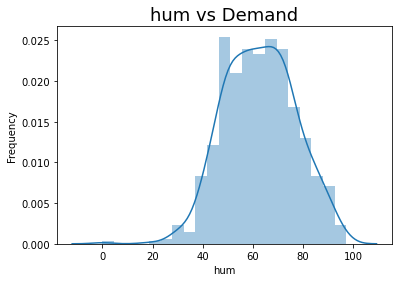

In [130]:
generate_univariate_distplots('hum')

######  Insights : hum : The demand for rental bikes is highest between humidity level of 56 to 75.

#### windspeed

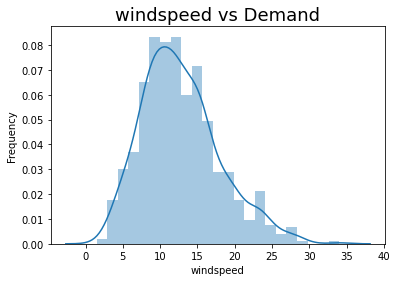

In [131]:
generate_univariate_distplots('windspeed')

######  Insights : windspeed : The demand for rental bikes peaks between windspeed of 10 to 15

### Bivariate Analysis

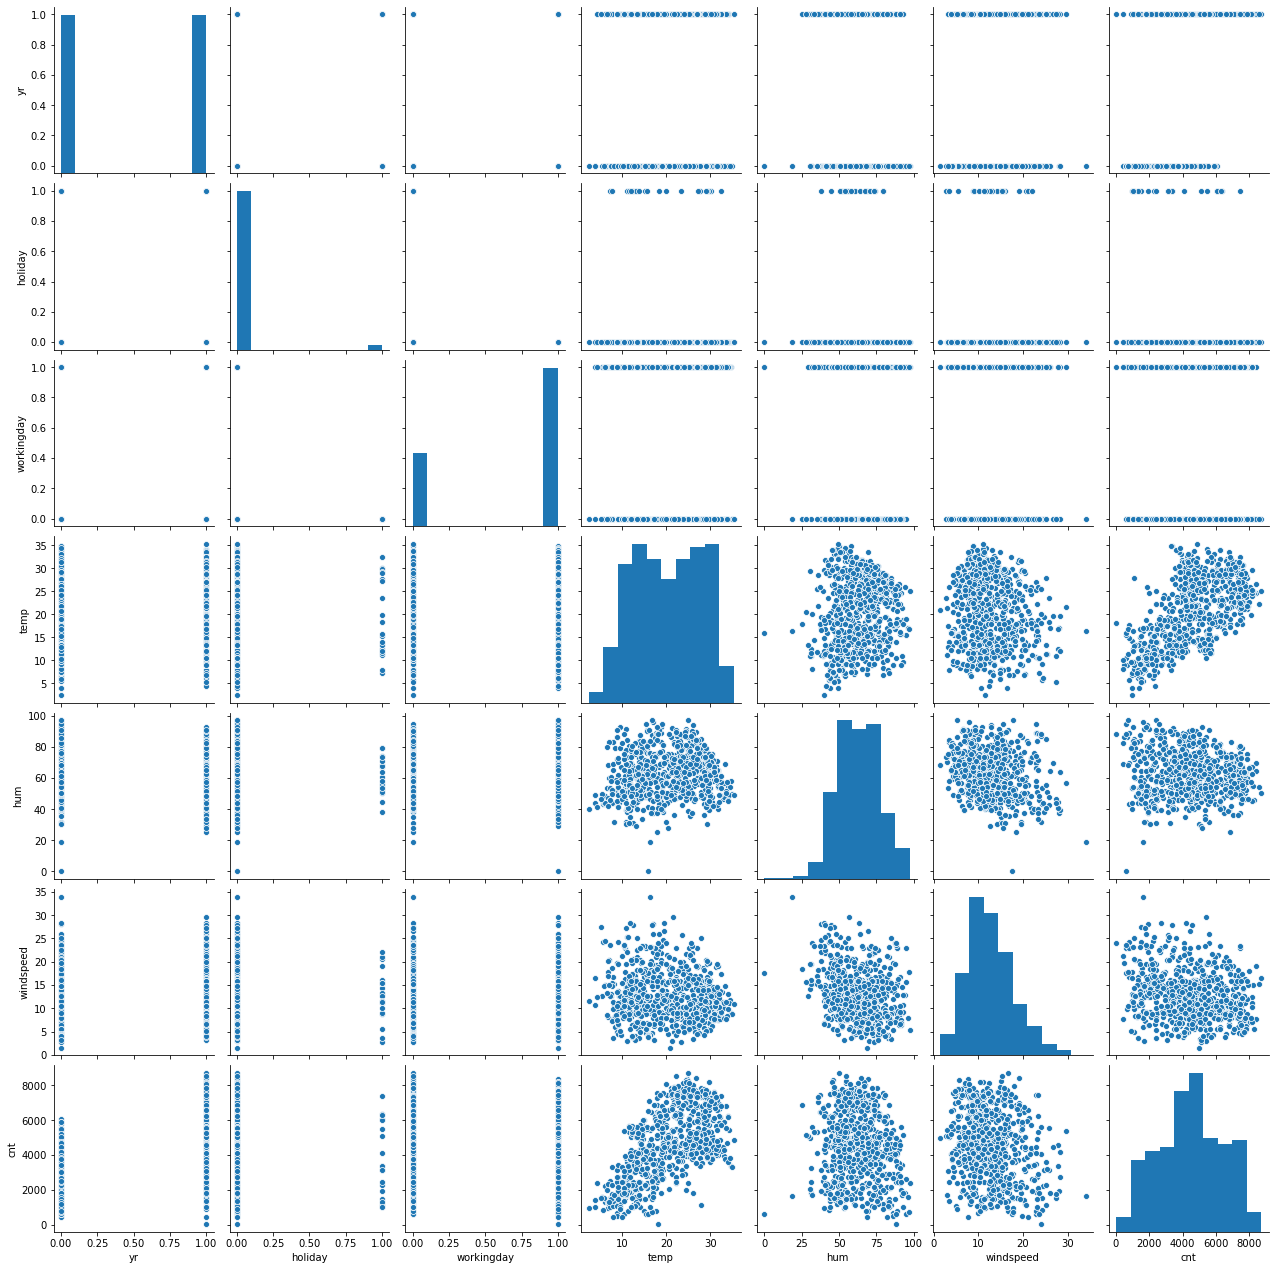

In [132]:
#pairplot of all numeric varaibles
sns.pairplot(bikes)
plt.show()

#### Insight: From the above pairplot we can see that all the independent variables are linearly related with the dependent target variable 'cnt'.<br> Hence we can create a linear regression model  to predict the dependent variable using the independent varaibles


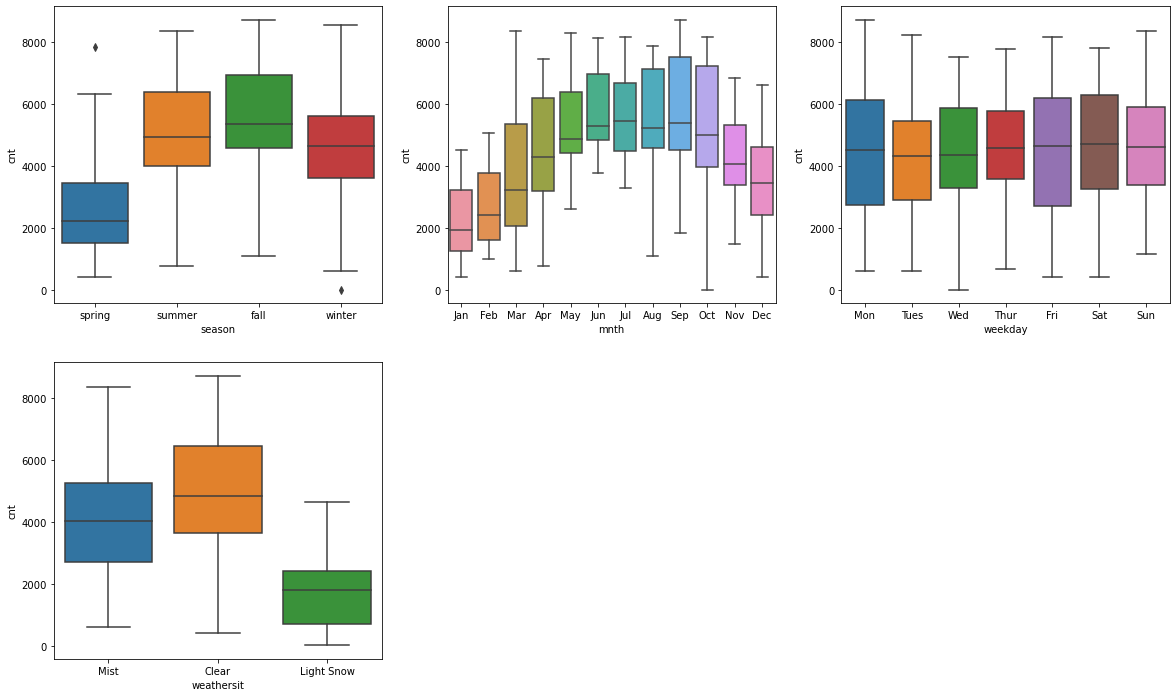

In [133]:
#Boxplot of categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

### Segmented Bivariate Analysis

##### season,weekday vs cnt

Text(0.5, 1.0, 'season,weekday vs cnt')

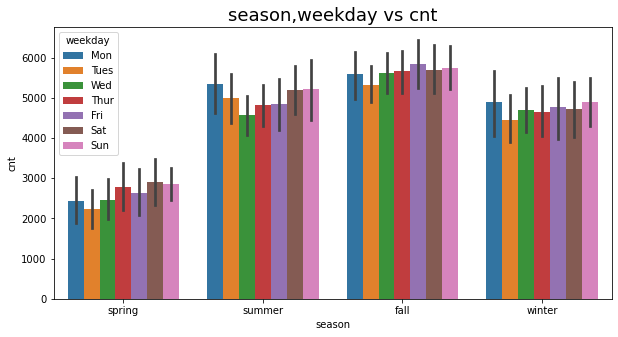

In [134]:
plt.figure(figsize=(10,5))

plot=sns.barplot(x = 'season', y = 'cnt',  hue= 'weekday',  data=bikes,  estimator=np.mean)
plot.set_title('season,weekday vs cnt',fontsize =18)


#### Insight: From the above graph we see that across all the seasons the demand is high in Sat Sun and particularly low on Tues

##### season,weathersit vs cnt

Text(0.5, 1.0, 'season,weathersit vs cnt')

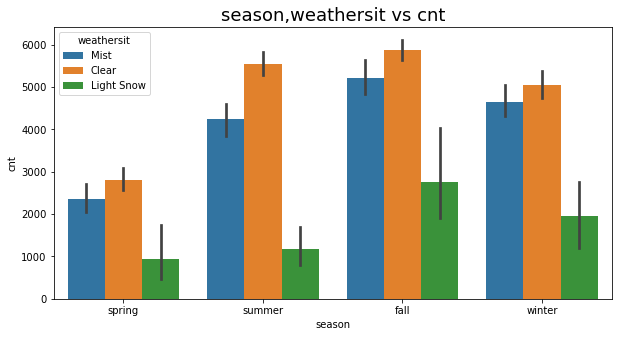

In [135]:
plt.figure(figsize=(10,5))

plot=sns.barplot(x = 'season', y = 'cnt',  hue= 'weathersit',  data=bikes,  estimator=np.mean)
plot.set_title('season,weathersit vs cnt',fontsize =18)


##### Insight: Across all the seasons demand is very high in Clear weather and particulary low in Light Snow

##### month,weathersit vs cnt

Text(0.5, 1.0, 'month,weathersit vs cnt')

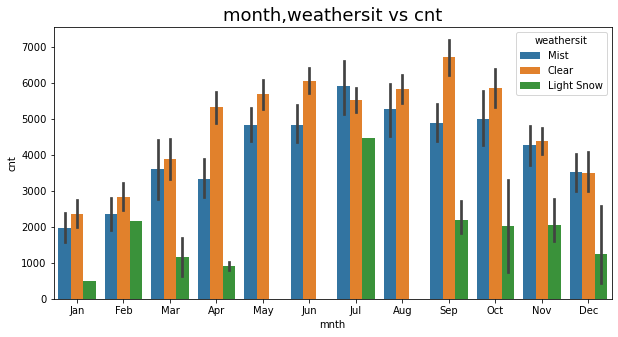

In [136]:
plt.figure(figsize=(10,5))

plot=sns.barplot(x = 'mnth', y = 'cnt',  hue= 'weathersit',  data=bikes,  estimator=np.mean)
plot.set_title('month,weathersit vs cnt',fontsize =18)


##### Insight: The demand is highest in Clear weather in month of Sep

## Step 4 : Data Preparation

#### Linear Regression does not accept categorical values .So we need to convert the categorical variables to dummy variables

### Creating Dummy variables

In [137]:
bikes.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


##### Dummy variable for season variable

In [138]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'
season = pd.get_dummies(bikes['season'])

In [139]:
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need three columns. We can drop the fall column, as the season can be identified with just the last three columns where —

000 will correspond to fall
100 will correspond to spring
010 will correspond to summer
001 will correspond to winter

In [140]:
# Let's drop the first column from season df using 'drop_first = True'

season = pd.get_dummies(bikes['season'], drop_first = True)

In [141]:
# Add the results to the original bikes dataframe

bikes = pd.concat([bikes, season], axis = 1)

In [142]:
# Now let's see the head of our dataframe.

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [143]:
#drop season column
bikes =bikes.drop('season',axis=1)

In [144]:
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


##### Dummy variable for mnth variable

In [145]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth'
month = pd.get_dummies(bikes['mnth'])

In [146]:
month.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


Now, we don't need three columns. We can drop the Apr column, as the month Apr  can be identified with just the last eleven columns where —

00000000000 will correspond to Apr


In [147]:
# Let's drop the first column from season df using 'drop_first = True'

month = pd.get_dummies(bikes['mnth'], drop_first = True)

In [148]:
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [149]:
# Add the results to the original bikes dataframe

bikes = pd.concat([bikes, month], axis = 1)

In [150]:
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [151]:
#drop mnth
bikes =bikes.drop('mnth',axis =1)

In [152]:
bikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


##### Dummy variable for weekday variable

In [153]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'day'
day = pd.get_dummies(bikes['weekday'])

In [154]:
day.head()

,Fri,Mon,Sat,Sun,Thur,Tues,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [155]:
#drop Fri
day =day.drop('Fri', axis=1)

In [156]:
day.head()

,Mon,Sat,Sun,Thur,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [157]:
# Add the results to the original bikes dataframe
bikes = pd.concat([bikes, day], axis = 1)

In [158]:
#drop weekday column
bikes=bikes.drop('weekday',axis=1)

In [159]:
bikes.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed
0,0,0,0,Mist,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur',
       'Tues', 'Wed'],
      dtype='object')

##### Dummy variable for weathersit variable

In [161]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(bikes['weathersit'])

In [162]:
weather.head()

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [163]:
#removing Clear
weather =weather.drop('Clear',axis =1)

In [164]:
weather.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [165]:
# Add the results to the original bikes dataframe
bikes=pd.concat([bikes,weather],axis=1)

In [166]:
#drop weathersit
bikes= bikes.drop('weathersit', axis=1)

In [167]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tues',
       'Wed', 'Light Snow', 'Mist'],
      dtype='object')

In [169]:
bikes.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [170]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Here we can see that except for `temp`,`hum`,`windspeed` all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. 
Here we are using Min-Max scaling to scale the variables


In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
scaler=MinMaxScaler()

In [173]:
# Apply scaler() to columns 'temp','hum','windspeed','cnt'
num_vars=['temp','hum','windspeed','cnt']
bikes_train[num_vars]=scaler.fit_transform(bikes_train[num_vars])

In [174]:
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### So here we see that values in the num_vars are all between 0 and 1

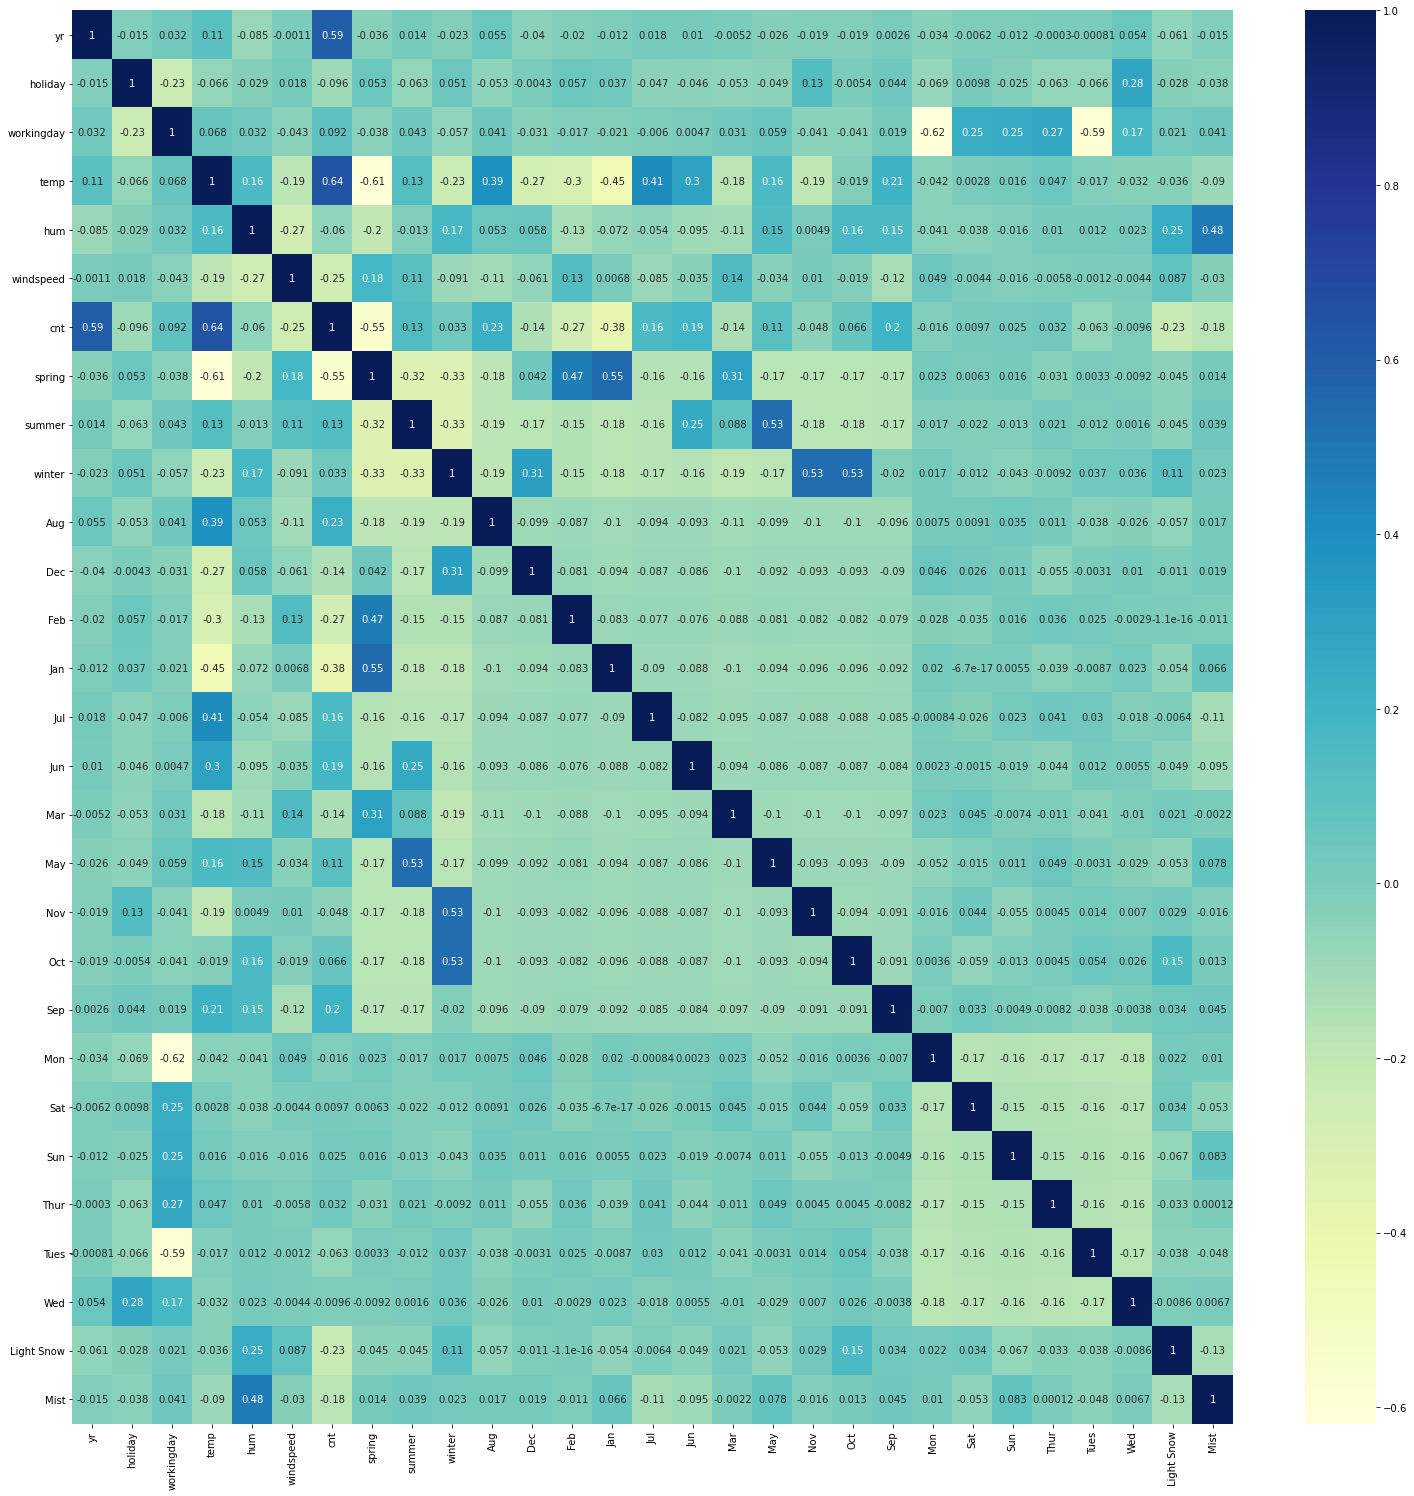

In [175]:
# Let's check the correlation coefficients to see which variables are highly correlated by creating a heatmap

plt.figure(figsize = (26, 26))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Here we see that 'temp' is most correlated with 'cnt' followed by 'yr'
#### Let us see a pairplot of 'temp' vs 'cnt' and 'yr' vs 'cnt'

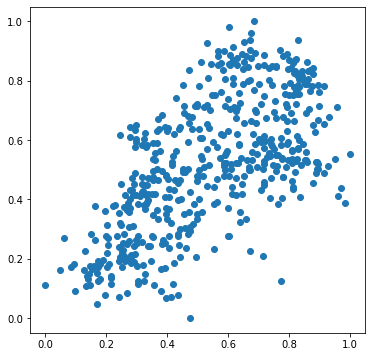

In [176]:
plt.figure(figsize=[6,6])
plt.scatter(bikes_train.temp,bikes_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [177]:
y_train=bikes_train.pop('cnt')
X_train=bikes_train

## Building a linear model
We need to build a model to fit a regression line through the training data.Since we have 28 independent variables we will be using the automated approach for Feature selection.This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


###  RFE

In [178]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [179]:
#Running RFE with output number of variable equal to 15
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [180]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 11),
 ('Thur', False, 9),
 ('Tues', False, 6),
 ('Wed', False, 8),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [181]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Mon', 'Light Snow', 'Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [182]:
X_train_rfe=X_train[col]

In [183]:
#build a linear model with all the columns in the X_train_rfe
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

const         0.251042
yr            0.230502
holiday      -0.058529
workingday    0.043521
temp          0.509836
hum          -0.154716
windspeed    -0.185956
spring       -0.050806
summer        0.049660
winter        0.094426
Jan          -0.034326
Jul          -0.053193
Sep           0.081186
Mon           0.053721
Light Snow   -0.248777
Mist         -0.057824
dtype: float64

In [184]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.31e-191
Time:                        23:49:39   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

Here we see that the variables have very low p values.Only Jan has a p-value of 0.048 which is little high.

#### Checking VIF

In [185]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Mist,2.29
0,yr,2.09
12,Mon,1.98


We generally want a VIF that is less than 5. 'hum' has a very high VIF.
However let us build another model by dropping 'Jan' and check the VIF values again

### Dropping the variable which is  insignificant and updating the model

In [187]:
X = X_train_rfe.drop('Jan', axis=1)

In [188]:
#Building a second model with lesser no of features
X_train_lm=sm.add_constant(X)
lr_1=sm.OLS(y_train,X_train_lm).fit()
lr_1.params

const         0.239379
yr            0.229738
holiday      -0.059434
workingday    0.043216
temp          0.527819
hum          -0.159467
windspeed    -0.180601
spring       -0.055434
summer        0.052613
winter        0.100294
Jul          -0.054881
Sep           0.081773
Mon           0.053203
Light Snow   -0.246332
Mist         -0.057847
dtype: float64

In [189]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.13e-191
Time:                        23:49:39   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2394      0.036      6.696      0.0

Here we see that the p-values are very low for all the varaibles.<br>Hence we can consider all of them significant.<br>Let us examine the VIF values again

#### Checking VIF

In [190]:
# Calculate the VIFs again for the new model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,Mist,2.28
0,yr,2.08
11,Mon,1.97


 Here we see that 'hum' has a very high VIF value.<br>Hence it is strongly correlated with other predictor variables<br> Let us drop 'hum' and build the model and check the VIF values again

### Dropping the variable which has high VIF value and updating the model

In [191]:
X = X.drop('hum', axis=1)

In [192]:
#Building a third model after dropping 'hum'
X_train_lm=sm.add_constant(X)
lr_2=sm.OLS(y_train,X_train_lm).fit()
lr_2.params

const         0.157668
yr            0.233626
holiday      -0.057148
workingday    0.046259
temp          0.492017
windspeed    -0.149124
spring       -0.065288
summer        0.046496
winter        0.085870
Jul          -0.049971
Sep           0.075781
Mon           0.058008
Light Snow   -0.290444
Mist         -0.083515
dtype: float64

In [193]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.73e-189
Time:                        23:49:39   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1577      0.031      5.134      0.0

Here we see that all the remaining variables have low p values and are still significant

#### Checking VIF

In [194]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,yr,2.07
7,winter,1.99
10,Mon,1.96
8,Jul,1.58
12,Mist,1.56


Here we see that after dropping 'hum' the VIF value for 'temp' has gone down from 16.97 to 6.97.<br> This implies that a lot of multicollinearity can be attributed to 'hum'<br>Among the remaining variables 'Mon' has the least correlation coeff with the target variable 'cnt'(-0.016).<br> Hence let us drop 'Mon', rebuild the model and examine

### Dropping the variable which has low correlation coeffiecient with 'cnt' and updating the model

In [195]:
X = X.drop('Mon', axis=1)

In [196]:
#Building a fourth model after droppingg 'Mon'
X_train_lm=sm.add_constant(X)
lr_3=sm.OLS(y_train,X_train_lm).fit()
lr_3.params

const         0.188598
yr            0.233102
holiday      -0.087227
workingday    0.016044
temp          0.490248
windspeed    -0.146306
spring       -0.066531
summer        0.045398
winter        0.084154
Jul          -0.051104
Sep           0.076575
Light Snow   -0.286517
Mist         -0.082113
dtype: float64

In [197]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.65e-187
Time:                        23:49:39   Log-Likelihood:                 500.81
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     497   BIC:                            -920.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1886      0.030      6.262      0.0

Here we see that 'workingday' has a high p-value(0.075)<br>Hence with the current model 'workingday' is insignificant and we should drop it

#### Checking VIF

In [198]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.01
4,windspeed,4.60
2,workingday,3.16
6,summer,2.26
5,spring,2.25
0,yr,2.07
7,winter,1.86
8,Jul,1.58
11,Mist,1.55
9,Sep,1.34


### Dropping the variable which is  insignificant and updating the model

In [199]:
X = X.drop('workingday', axis=1)

In [200]:
#Building a fifth model by dropping 'working day'
X_train_lm=sm.add_constant(X)
lr_4=sm.OLS(y_train,X_train_lm).fit()
lr_4.params

const         0.199648
yr            0.233482
holiday      -0.098013
temp          0.491508
windspeed    -0.147977
spring       -0.066942
summer        0.045280
winter        0.083084
Jul          -0.052418
Sep           0.076686
Light Snow   -0.285155
Mist         -0.081558
dtype: float64

In [201]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.40e-187
Time:                        23:49:39   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [202]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,Jul,1.58
10,Mist,1.55
8,Sep,1.34
9,Light Snow,1.08


Here we see that all the variables have VIF less than 5<br>Only'temp' has a VIF value which is little more than 5<br>But 'temp' is highly correlated with 'cnt'.<br>Among the remaining variables 'summer' has the lowest correlation coeff.<br> Hence let us drop 'summer' and rebuild the model

### Dropping the variable 'summer' and updating the model

In [203]:
X = X.drop('summer', axis=1)

In [204]:
#Building a sixth model with lesser no of features
X_train_lm=sm.add_constant(X)
lr_5=sm.OLS(y_train,X_train_lm).fit()
lr_5.params

const         0.251899
yr            0.234092
holiday      -0.098556
temp          0.451455
windspeed    -0.139817
spring       -0.110795
winter        0.047278
Jul          -0.072719
Sep           0.057705
Light Snow   -0.286408
Mist         -0.081133
dtype: float64

In [205]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.16e-186
Time:                        23:49:39   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.0

Here we see that all the p-values are very low.<br>Let us check the VIF values

#### Checking VIF

In [206]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist,1.51
5,winter,1.40
6,Jul,1.35
7,Sep,1.20
8,Light Snow,1.08
1,holiday,1.04


the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using the model lr_5 only.

##### The Adjusted R -Square for train data is 0.825

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [207]:
y_train_pred = lr_5.predict(X_train_lm)

In [208]:
y_train.shape
y_train_pred.shape
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'Jul', 'Sep', 'Light Snow', 'Mist'],
      dtype='object')

Text(0.5, 0, 'Errors')

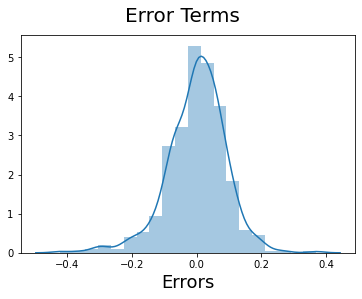

In [209]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We see that the error terms are normally distributed with mean centred around zero

## Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. lr_5.



#### Applying the scaling on the test sets

In [210]:
num_vars=['temp','hum','windspeed','cnt']
bikes_test[num_vars]=scaler.transform(bikes_test[num_vars])

In [211]:
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [212]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [213]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Light Snow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
col=X_test.columns[rfe.support_]
X_test_rfe=X_test[col]
X_test_rfe.head()
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Mon', 'Light Snow', 'Mist'],
      dtype='object')


In [215]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test_rfe)

In [216]:
X_test_m5 = X_test_m5.drop(["hum", "Jan","workingday","Mon","summer"], axis = 1)

In [217]:
# Making predictions using the lr_5 model

y_test_pred= lr_5.predict(X_test_m5)

Text(0, 0.5, 'y_pred')

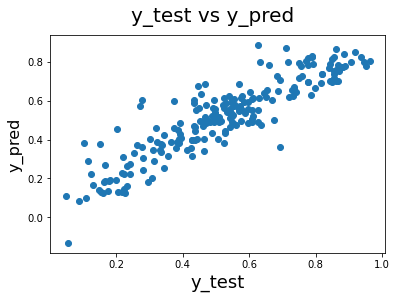

In [218]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [219]:
from sklearn.metrics import r2_score

In [220]:
#evaluate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8070101019557961

##### Adjusted R-Square for test set is 0.80

We can see that the equation of our best fitted line is:

$ cnt = 0.389  \times  temp + 0.235  \times  yr + 0.047 \times winter + 0.056 \times Sep - 0.092 \times holiday - 0.151 \times windspeed - 0.145 \times spring - 0.073 \times Jul - 0.27 \times Light Snow - 0.082 \times Mist  $

## Analysis

###### From the above equation we see that the following variables are significant in predicting the demand:
1.temp : temp has the highest correlation coefficient and with every unit increase in temp the target variable increase by 0.385 (provided the other variables are constant)<br>
2.yr  :This variable also has a fairly high positive correlation coeffiecient with the target variable<br>
3.winter :This variable has a positive correlation coeff with the target variable<br>
4.Sep :This variable has a positive correlation coeff with the target variable<br>
5.holiday:This variable has a negative correlation coeff with the target variable<br>
6.windspeed:This variable has a negative correlation coeff with the target variable<br>
7.spring:This variable has a negative correlation coeff with the target variable<br>
8.Jul:This variable has a negative correlation coeff with the target variable<br>
9.LightSnow:This variable has a negative correlation coeff with the target variable<br>
10.Mist:This variable has a negative correlation coeff with the target variable<br>


In [1]:
a= 10,20,30,40
print(a)

(10, 20, 30, 40)


In [2]:
string='analyticz'
string[:1]+"s"

'as'

In [3]:
print(substr("tutorials point",2,11))

NameError: name 'substr' is not defined

In [4]:
import pandas as pd
df=pd.DataFrame({'a':[1,2,3,4,5]})

In [6]:
df.iat['a',0]

ValueError: iAt based indexing can only have integer indexers

In [7]:
for i in range(1,10):
    if i == 5:
        pass
    else:
        print(i, end = " ")

1 2 3 4 6 7 8 9 

In [8]:
9*3**2+8^7//2

90